In [ ]:
# import libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
df = pd.read_csv("Train_Test_IoT_Fridge.csv")
df.head()

,ts,date,time,fridge_temperature,temp_condition,label,type
0,1556245180,25-Apr-19,19:19:40,9.00,high,1,ddos
1,1556245180,25-Apr-19,19:19:40,9.25,high,1,ddos
2,1556245185,25-Apr-19,19:19:45,12.65,high,1,ddos
3,1556245185,25-Apr-19,19:19:45,4.65,low,1,ddos
4,1556245195,25-Apr-19,19:19:55,12.65,high,1,ddos


In [ ]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                    count  percentage
ts                      0         0.0
date                    0         0.0
time                    0         0.0
fridge_temperature      0         0.0
temp_condition          0         0.0
label                   0         0.0
type                    0         0.0


In [ ]:
# calculate duplicates 
dups = df.duplicated() 
# report if there are any duplicates 
print(dups.any()) 
# list all duplicate rows 
print(df[dups])
print(df.shape) 
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)

True
               ts       date            time  fridge_temperature  \
59     1556245360  25-Apr-19       19:22:40                 3.20   
157    1556245775  25-Apr-19       19:29:35                 1.00   
237    1556246026  25-Apr-19       19:33:46                 2.00   
281    1556246171  25-Apr-19       19:36:11                 6.25   
289    1556246196  25-Apr-19       19:36:36                 8.65   
...           ...        ...             ...                 ...   
59929  1554203235   2-Apr-19     04:07:15                   7.50   
59932  1554203235   2-Apr-19     04:07:15                   4.00   
59934  1554203235   2-Apr-19     04:07:15                   2.00   
59936  1554203235   2-Apr-19     04:07:15                  12.95   
59939  1554203235   2-Apr-19     04:07:15                   7.65   

      temp_condition  label    type  
59               low      1    ddos  
157              low      1    ddos  
237              low      1    ddos  
281             high      

In [ ]:
type('date')

str

In [ ]:
type('time')

str

In [ ]:
df['date'] = pd.to_datetime(df['date'])
print(df)

               ts       date            time  fridge_temperature  \
0      1556245180 2019-04-25       19:19:40                 9.00   
1      1556245180 2019-04-25       19:19:40                 9.25   
2      1556245185 2019-04-25       19:19:45                12.65   
3      1556245185 2019-04-25       19:19:45                 4.65   
4      1556245195 2019-04-25       19:19:55                12.65   
...           ...        ...             ...                 ...   
59938  1554203235 2019-04-02     04:07:15                   9.85   
59940  1554203235 2019-04-02     04:07:15                  13.85   
59941  1554203235 2019-04-02     04:07:15                   5.40   
59942  1554203235 2019-04-02     04:07:15                   2.90   
59943  1554203235 2019-04-02     04:07:15                   7.85   

      temp_condition  label    type  
0               high      1    ddos  
1               high      1    ddos  
2               high      1    ddos  
3                low      1    

In [ ]:
#Transform string to date
df['date'] = pd.to_datetime(df.date, format="%d-%m-%Y")

In [ ]:
#Extracting Year
df['year'] = df['date'].dt.year

#Extracting Month
df['month'] = df['date'].dt.month

#Extracting the weekday name of the date
df['day_name'] = df['date'].dt.day_name()

In [ ]:
# dealing with attribute time
#new data frame with split value columns
new = df['time'].str.split(':',n=2,expand=True)

In [ ]:
# making separate first name column from new data frame
df["hour"]= new[0]
df["min"]= new[1]
df["sec"]= new[2]

In [ ]:
df['month'] = df['month'].astype(int)

In [ ]:
df['hour'] = df['hour'].astype(int)

In [ ]:
df.month.unique()

array([4, 3])

In [ ]:
df.hour.unique()

array([19, 14, 15,  6,  7,  8, 12, 20, 21,  0,  1, 16, 17,  9, 18,  4, 13,
        3,  5])

In [ ]:
df['hour_sin'] = np.sin((df.hour-1)*(2.*np.pi/24))
df['hour_cos'] = np.cos((df.hour-1)*(2.*np.pi/24))

df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

In [ ]:
df

,ts,date,time,fridge_temperature,temp_condition,label,type,year,month,day_name,hour,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556245180,2019-04-25,19:19:40,9.00,high,1,ddos,2019,4,Thursday,19,19,40,-1.000000,-1.836970e-16,1.0,6.123234e-17
1,1556245180,2019-04-25,19:19:40,9.25,high,1,ddos,2019,4,Thursday,19,19,40,-1.000000,-1.836970e-16,1.0,6.123234e-17
2,1556245185,2019-04-25,19:19:45,12.65,high,1,ddos,2019,4,Thursday,19,19,45,-1.000000,-1.836970e-16,1.0,6.123234e-17
3,1556245185,2019-04-25,19:19:45,4.65,low,1,ddos,2019,4,Thursday,19,19,45,-1.000000,-1.836970e-16,1.0,6.123234e-17
4,1556245195,2019-04-25,19:19:55,12.65,high,1,ddos,2019,4,Thursday,19,19,55,-1.000000,-1.836970e-16,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59938,1554203235,2019-04-02,04:07:15,9.85,high,0,normal,2019,4,Tuesday,4,07,15,0.707107,7.071068e-01,1.0,6.123234e-17
59940,1554203235,2019-04-02,04:07:15,13.85,high,0,normal,2019,4,Tuesday,4,07,15,0.707107,7.071068e-01,1.0,6.123234e-17
59941,1554203235,2019-04-02,04:07:15,5.40,low,0,normal,2019,4,Tuesday,4,07,15,0.707107,7.071068e-01,1.0,6.123234e-17
59942,1554203235,2019-04-02,04:07:15,2.90,low,0,normal,2019,4,Tuesday,4,07,15,0.707107,7.071068e-01,1.0,6.123234e-17


In [ ]:
# drop columns 
df = df.drop(['ts', 'time','label','date','min','sec','hour','month'], axis=1)

In [ ]:
df

,fridge_temperature,temp_condition,type,year,day_name,hour_sin,hour_cos,month_sin,month_cos
0,9.00,high,ddos,2019,Thursday,-1.000000,-1.836970e-16,1.0,6.123234e-17
1,9.25,high,ddos,2019,Thursday,-1.000000,-1.836970e-16,1.0,6.123234e-17
2,12.65,high,ddos,2019,Thursday,-1.000000,-1.836970e-16,1.0,6.123234e-17
3,4.65,low,ddos,2019,Thursday,-1.000000,-1.836970e-16,1.0,6.123234e-17
4,12.65,high,ddos,2019,Thursday,-1.000000,-1.836970e-16,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...
59938,9.85,high,normal,2019,Tuesday,0.707107,7.071068e-01,1.0,6.123234e-17
59940,13.85,high,normal,2019,Tuesday,0.707107,7.071068e-01,1.0,6.123234e-17
59941,5.40,low,normal,2019,Tuesday,0.707107,7.071068e-01,1.0,6.123234e-17
59942,2.90,low,normal,2019,Tuesday,0.707107,7.071068e-01,1.0,6.123234e-17


In [ ]:
# transform int to string
#df['label'] = df['label'].astype(str)

In [ ]:
df.temp_condition.unique()

array(['high', 'low', 'high ', 'low ', 'low  ', 'high  '], dtype=object)

In [ ]:
df.temp_condition.replace(['high ', 'low ', 'low  ', 'high  '], ['high','low','low','high'], inplace=True)

In [ ]:
df.temp_condition.unique()

array(['high', 'low'], dtype=object)

In [ ]:
df.type.unique()

array(['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss'], dtype=object)

In [ ]:
df['type'].value_counts()

normal        26215
backdoor       5000
injection      4975
password       4972
ddos           4964
ransomware     2900
xss            2017
Name: type, dtype: int64

In [ ]:
# df.temp_condition.replace(['ddos', 'backdoor', 'injection', 'normal', 'password',
       # 'ransomware', 'xss'], [0,1,2,3,4,5,6], inplace=True)

In [ ]:
df['type'].value_counts()

normal        26215
backdoor       5000
injection      4975
password       4972
ddos           4964
ransomware     2900
xss            2017
Name: type, dtype: int64

In [ ]:
# populate the numerical and categorical variables
num_list = []
cat_list = []
for column in df:
   if column != 'label': # separate lable
       if is_numeric_dtype(df[column]):
           num_list.append(column)
       elif is_string_dtype(df[column]):
           cat_list.append(column)

In [ ]:
num_list


['fridge_temperature',
 'year',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [ ]:
cat_list

['temp_condition', 'type', 'day_name']

In [ ]:
### 2. Feature Engineering and EDA  ###

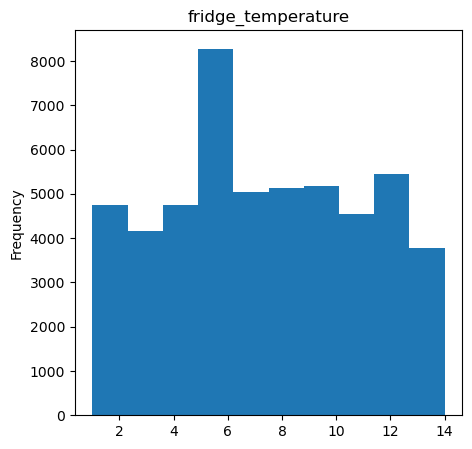

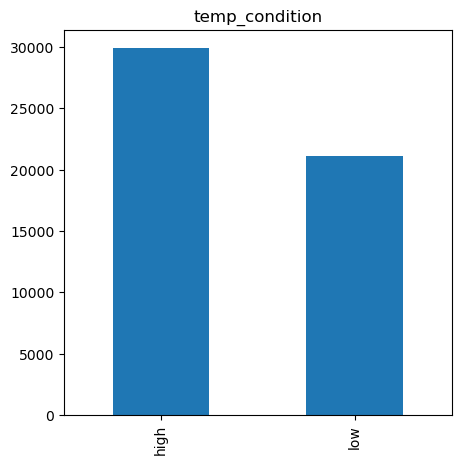

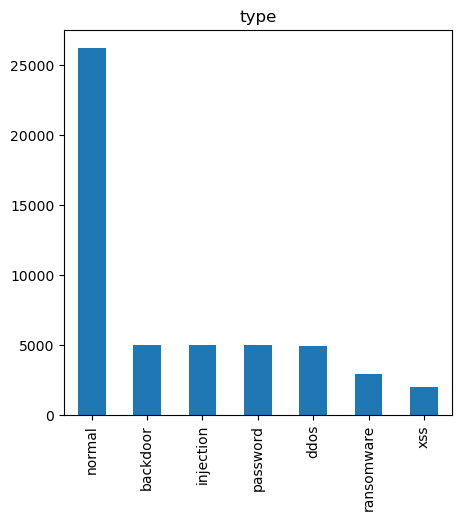

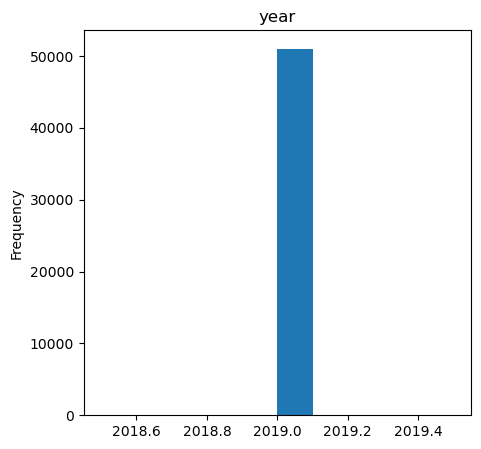

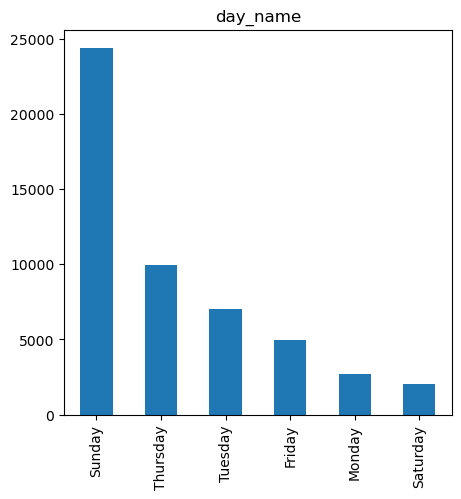

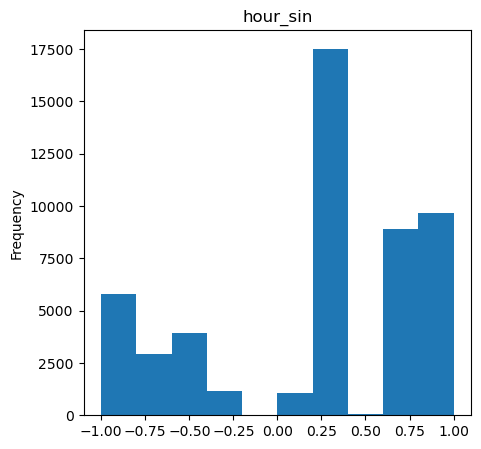

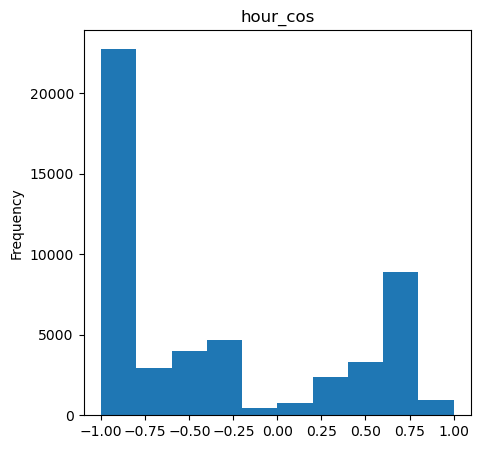

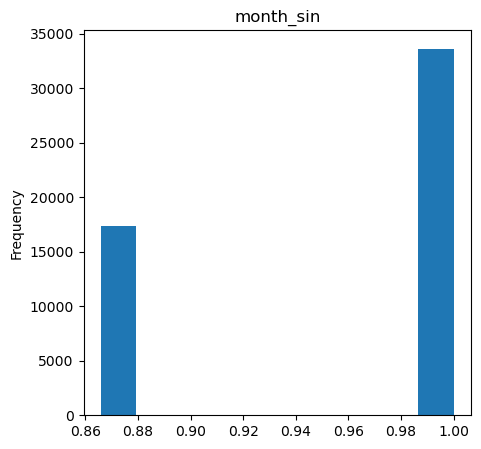

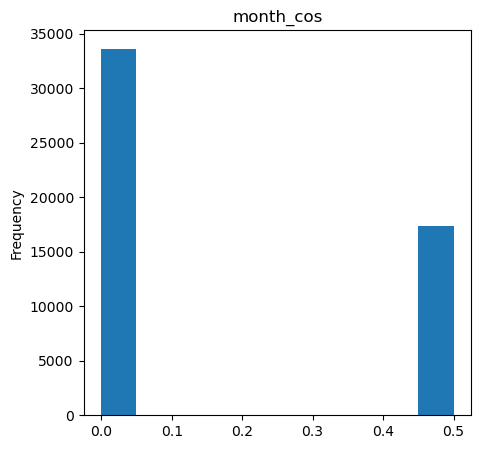

In [ ]:
# univariate analysis
for column in df:
   plt.figure(column, figsize = (5,5))
   plt.title(column)
   if is_numeric_dtype(df[column]):
       df[column].plot(kind = 'hist')
   elif is_string_dtype(df[column]):
       df[column].value_counts()[:10].plot(kind = 'bar')


In [ ]:
df.type.unique()

array(['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss'], dtype=object)

In [ ]:
df['type'].value_counts()

normal        26215
backdoor       5000
injection      4975
password       4972
ddos           4964
ransomware     2900
xss            2017
Name: type, dtype: int64

In [ ]:
df

,fridge_temperature,temp_condition,type,year,day_name,hour_sin,hour_cos,month_sin,month_cos
0,9.00,high,ddos,2019,Thursday,-1.000000,-1.836970e-16,1.0,6.123234e-17
1,9.25,high,ddos,2019,Thursday,-1.000000,-1.836970e-16,1.0,6.123234e-17
2,12.65,high,ddos,2019,Thursday,-1.000000,-1.836970e-16,1.0,6.123234e-17
3,4.65,low,ddos,2019,Thursday,-1.000000,-1.836970e-16,1.0,6.123234e-17
4,12.65,high,ddos,2019,Thursday,-1.000000,-1.836970e-16,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...
59938,9.85,high,normal,2019,Tuesday,0.707107,7.071068e-01,1.0,6.123234e-17
59940,13.85,high,normal,2019,Tuesday,0.707107,7.071068e-01,1.0,6.123234e-17
59941,5.40,low,normal,2019,Tuesday,0.707107,7.071068e-01,1.0,6.123234e-17
59942,2.90,low,normal,2019,Tuesday,0.707107,7.071068e-01,1.0,6.123234e-17


In [ ]:
# encoding categorical data using dummies
#from sklearn.preprocessing import LabelEncoder
#categorical_features = ['label']
#for i in categorical_features:
  # df[i] = LabelEncoder().fit_transform(df[i])

In [ ]:
# encoding categorical data using dummies
#from sklearn.preprocessing import LabelEncoder
#categorical_features = ['type']
#for i in categorical_features:
 #  df[i] = LabelEncoder().fit_transform(df[i])

In [ ]:
df['type'].value_counts()

normal        26215
backdoor       5000
injection      4975
password       4972
ddos           4964
ransomware     2900
xss            2017
Name: type, dtype: int64

In [ ]:
df.type.unique()

array(['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss'], dtype=object)

In [ ]:
df['type'].value_counts()

normal        26215
backdoor       5000
injection      4975
password       4972
ddos           4964
ransomware     2900
xss            2017
Name: type, dtype: int64

In [ ]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['day_name'],return_df=True)

In [ ]:
df=encoder.fit_transform(df) 

In [ ]:
from category_encoders import OrdinalEncoder 
maplist = [{'col': 'temp_condition', 'mapping': {'low': 0, 'high': 1}}]
oe = OrdinalEncoder(mapping=maplist)

In [ ]:
df=oe.fit_transform(df) 

In [ ]:
df

,fridge_temperature,temp_condition,type,year,day_name_0,day_name_1,day_name_2,hour_sin,hour_cos,month_sin,month_cos
0,9.00,1,ddos,2019,0,0,1,-1.000000,-1.836970e-16,1.0,6.123234e-17
1,9.25,1,ddos,2019,0,0,1,-1.000000,-1.836970e-16,1.0,6.123234e-17
2,12.65,1,ddos,2019,0,0,1,-1.000000,-1.836970e-16,1.0,6.123234e-17
3,4.65,0,ddos,2019,0,0,1,-1.000000,-1.836970e-16,1.0,6.123234e-17
4,12.65,1,ddos,2019,0,0,1,-1.000000,-1.836970e-16,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
59938,9.85,1,normal,2019,1,0,0,0.707107,7.071068e-01,1.0,6.123234e-17
59940,13.85,1,normal,2019,1,0,0,0.707107,7.071068e-01,1.0,6.123234e-17
59941,5.40,0,normal,2019,1,0,0,0.707107,7.071068e-01,1.0,6.123234e-17
59942,2.90,0,normal,2019,1,0,0,0.707107,7.071068e-01,1.0,6.123234e-17


In [ ]:
df.columns

Index(['fridge_temperature', 'temp_condition', 'type', 'year', 'day_name_0',
       'day_name_1', 'day_name_2', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos'],
      dtype='object')

In [ ]:
list(df.columns)

['fridge_temperature',
 'temp_condition',
 'type',
 'year',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

<AxesSubplot:>

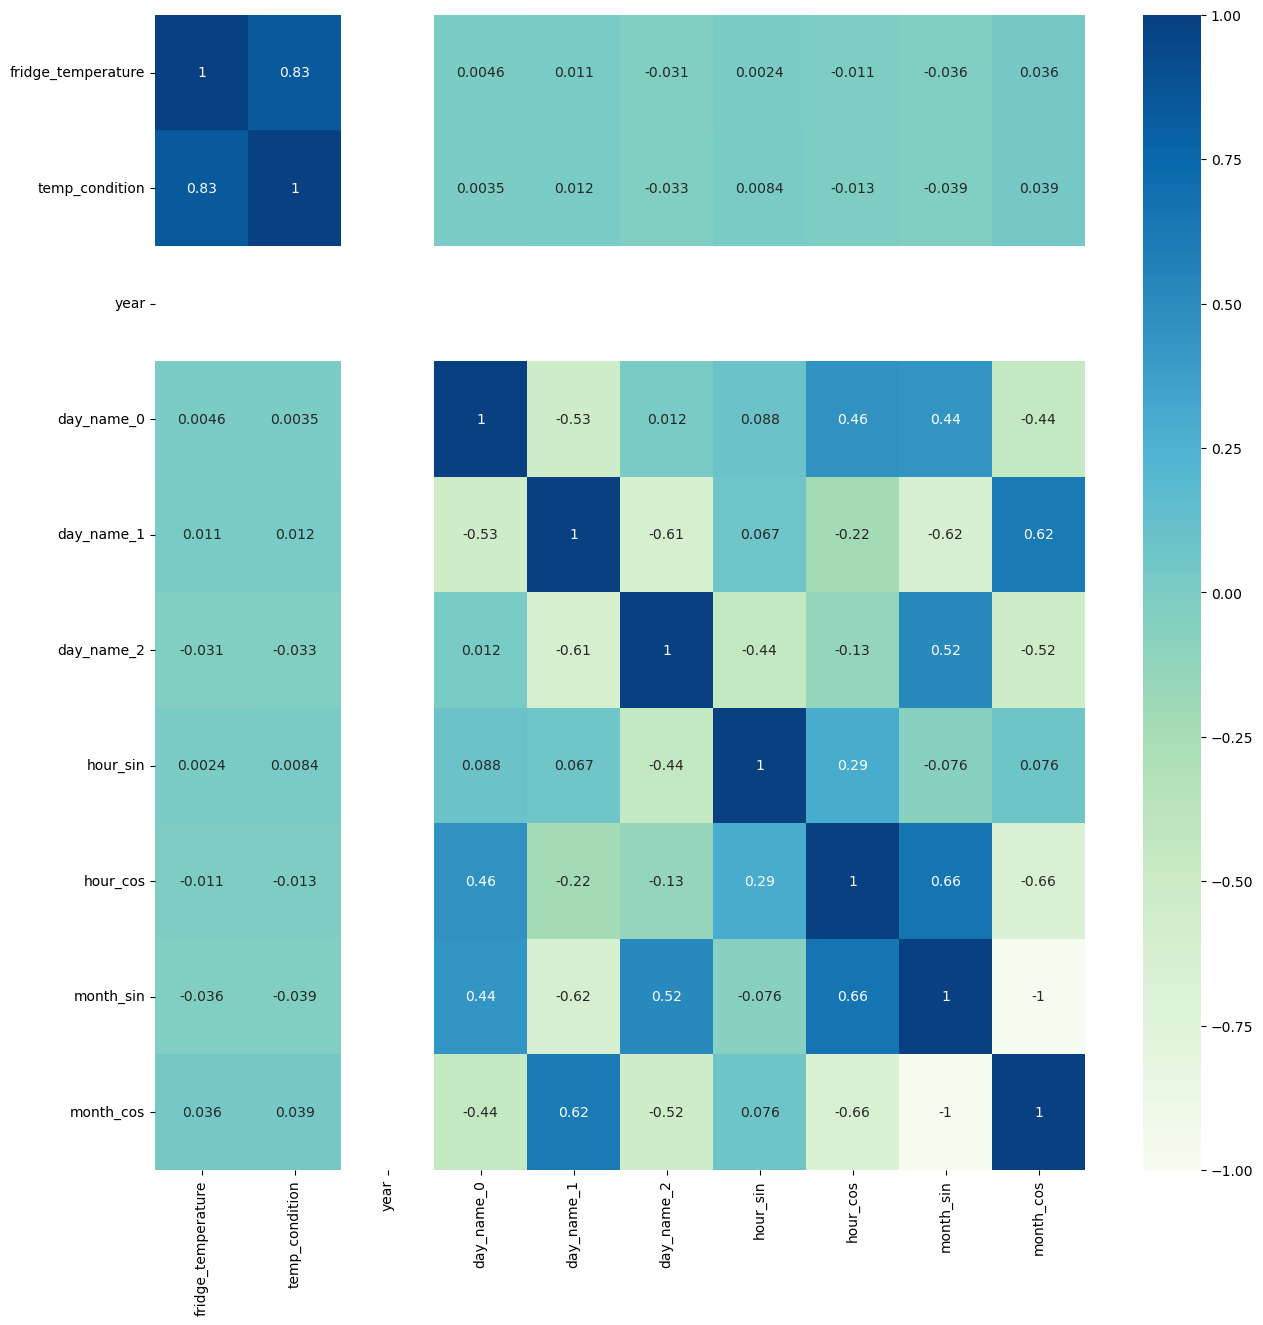

In [ ]:
# multivariate analysis
plt.figure(1, figsize = (15,15))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)


In [ ]:
# select and rearrange columns
df = df[['fridge_temperature', 'temp_condition', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos' ,'day_name_0',
       'day_name_1', 'day_name_2', 'type']]

In [ ]:
df

,fridge_temperature,temp_condition,hour_sin,hour_cos,month_sin,month_cos,day_name_0,day_name_1,day_name_2,type
0,9.00,1,-1.000000,-1.836970e-16,1.0,6.123234e-17,0,0,1,ddos
1,9.25,1,-1.000000,-1.836970e-16,1.0,6.123234e-17,0,0,1,ddos
2,12.65,1,-1.000000,-1.836970e-16,1.0,6.123234e-17,0,0,1,ddos
3,4.65,0,-1.000000,-1.836970e-16,1.0,6.123234e-17,0,0,1,ddos
4,12.65,1,-1.000000,-1.836970e-16,1.0,6.123234e-17,0,0,1,ddos
...,...,...,...,...,...,...,...,...,...,...
59938,9.85,1,0.707107,7.071068e-01,1.0,6.123234e-17,1,0,0,normal
59940,13.85,1,0.707107,7.071068e-01,1.0,6.123234e-17,1,0,0,normal
59941,5.40,0,0.707107,7.071068e-01,1.0,6.123234e-17,1,0,0,normal
59942,2.90,0,0.707107,7.071068e-01,1.0,6.123234e-17,1,0,0,normal


In [ ]:
#numerical variables for scaling
n = df.iloc[:,:-4]

In [ ]:
n.head()

,fridge_temperature,temp_condition,hour_sin,hour_cos,month_sin,month_cos
0,9.00,1,-1.0,-1.836970e-16,1.0,6.123234e-17
1,9.25,1,-1.0,-1.836970e-16,1.0,6.123234e-17
2,12.65,1,-1.0,-1.836970e-16,1.0,6.123234e-17
3,4.65,0,-1.0,-1.836970e-16,1.0,6.123234e-17
4,12.65,1,-1.0,-1.836970e-16,1.0,6.123234e-17


In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(n)
robust_df = pd.DataFrame(robust_df, columns =['fridge_temperature', 'temp_condition', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos'])

In [ ]:
robust_df

,fridge_temperature,temp_condition,hour_sin,hour_cos,month_sin,month_cos
0,0.356522,0.0,-1.303225,0.482362,0.0,0.0
1,0.400000,0.0,-1.303225,0.482362,0.0,0.0
2,0.991304,0.0,-1.303225,0.482362,0.0,0.0
3,-0.400000,-1.0,-1.303225,0.482362,0.0,0.0
4,0.991304,0.0,-1.303225,0.482362,0.0,0.0
...,...,...,...,...,...,...
51038,0.504348,0.0,0.464102,0.964724,0.0,0.0
51039,1.200000,0.0,0.464102,0.964724,0.0,0.0
51040,-0.269565,-1.0,0.464102,0.964724,0.0,0.0
51041,-0.704348,-1.0,0.464102,0.964724,0.0,0.0


In [ ]:
result = df.dtypes
print(result)

fridge_temperature    float64
temp_condition          int32
hour_sin              float64
hour_cos              float64
month_sin             float64
month_cos             float64
day_name_0              int64
day_name_1              int64
day_name_2              int64
type                   object
dtype: object


In [ ]:
# extracting not scaled features (target feature + categorical features)
extracted_col= df[['day_name_0',
 'day_name_1',
 'day_name_2','type']]
standardized_df = robust_df.join(extracted_col)

In [ ]:
# reset index
robust_df.reset_index(drop=True, inplace=True)
extracted_col.reset_index(drop=True, inplace=True)

In [ ]:
standardized_df = robust_df.join(extracted_col)

In [ ]:
# new dataframe, which is used for Logistic Regression
standardized_df

,fridge_temperature,temp_condition,hour_sin,hour_cos,month_sin,month_cos,day_name_0,day_name_1,day_name_2,type
0,0.356522,0.0,-1.303225,0.482362,0.0,0.0,0,0,1,ddos
1,0.400000,0.0,-1.303225,0.482362,0.0,0.0,0,0,1,ddos
2,0.991304,0.0,-1.303225,0.482362,0.0,0.0,0,0,1,ddos
3,-0.400000,-1.0,-1.303225,0.482362,0.0,0.0,0,0,1,ddos
4,0.991304,0.0,-1.303225,0.482362,0.0,0.0,0,0,1,ddos
...,...,...,...,...,...,...,...,...,...,...
51038,0.504348,0.0,0.464102,0.964724,0.0,0.0,1,0,0,normal
51039,1.200000,0.0,0.464102,0.964724,0.0,0.0,1,0,0,normal
51040,-0.269565,-1.0,0.464102,0.964724,0.0,0.0,1,0,0,normal
51041,-0.704348,-1.0,0.464102,0.964724,0.0,0.0,1,0,0,normal


In [ ]:
X = standardized_df.iloc[:,:-1]
y = standardized_df["type"]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
 
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold

X = standardized_df.iloc[:,:-1]
y = standardized_df["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



lr = LogisticRegression(penalty='l1',C=1, solver='liblinear',  max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

              precision    recall  f1-score   support

    backdoor       0.72      0.82      0.76      1500
        ddos       1.00      1.00      1.00      1489
   injection       1.00      1.00      1.00      1492
      normal       0.97      0.94      0.95      7865
    password       1.00      1.00      1.00      1492
  ransomware       1.00      1.00      1.00       870
         xss       1.00      1.00      1.00       605

    accuracy                           0.95     15313
   macro avg       0.95      0.97      0.96     15313
weighted avg       0.95      0.95      0.95     15313



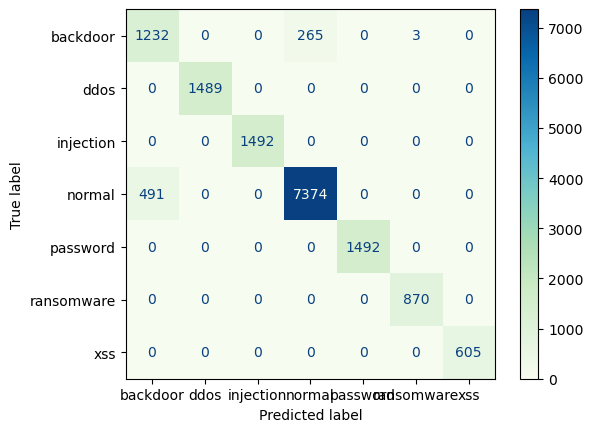

In [ ]:
from sklearn import metrics

# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(lr, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

# accuracy
print(classification_report(y_test, y_pred))